In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]) # создали данные
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]) #  бинарные метки

In [3]:
n_train = len(x_train)                          # размер обучающей выборки
w = [0, -1]                                     # начальное значение вектора w
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # решающее правило (скалярное произведение, дающее либо +1 либо -1)
N = 50                                          # максимальное число итераций
L = 0.1                                         # шаг изменения веса
e = 0.1    
                                     # небольшая добавка для w0 чтобы был зазор между разделяющей линией и граничным образом

last_error_index = -1                           # индекс последнего ошибочного наблюдения


In [4]:
for n in range(N):
    for i in range(n_train):                # перебор по наблюдениям
        if y_train[i]*a(x_train[i]) < 0:    # если ошибка классификации,
            w[0] = w[0] + L * y_train[i]    # то корректировка веса w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      # показатель качества классификации (число ошибок)
        break       # останов, если все верно классифицируем

In [5]:
if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [w[0]*x for x in line_x]

[1.6000000000000003, -1]


In [6]:
x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

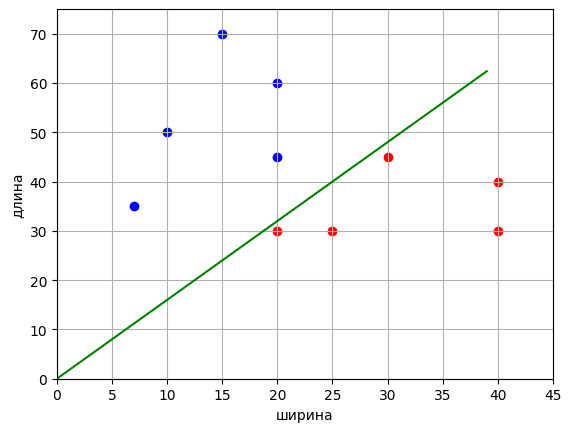

In [7]:
plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [10]:
pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0) # точное решение по методу наименьших квадратов
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)
w = np.dot(pt, np.linalg.inv(xxt))
print(w)

[ 0.05793234 -0.0346272   0.1912188 ]


In [11]:
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2]/w[1] for x in line_x]

In [12]:
x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

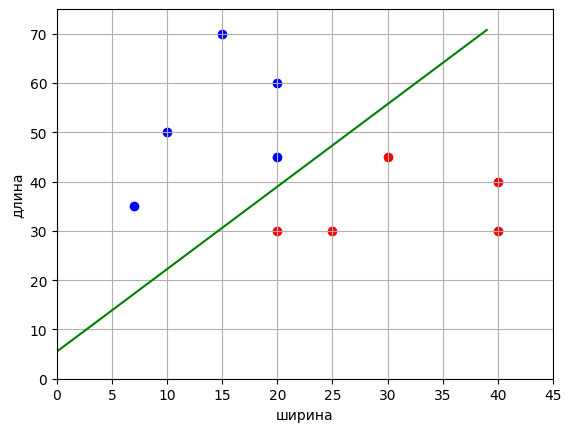

In [15]:
plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')
plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

In [ ]:
Градиентный спуск берет все выборку, 
считает для каждого объекта градиент функции ошибки (а именно считаем для начала саму функцию ошибки как разность объекта и истины а затем 
дифференцируем), потом усредняем. 

А стохаистический градиентный спуск не усредняет, а берет и сразу прибавляет вектор, ну или усредняет по подвыборке. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# сигмоидная функция потерь 
# вводим такую функцию потерь, чтобы сгладить нашу функцию, иначе подставляя значения (объекты) градиента никакого не получаем
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

In [ ]:
# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y

In [ ]:
# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [ ]:
n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

In [ ]:
for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

In [ ]:
print(w)
print(Q_plot)

line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()